In [78]:
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
iris = datasets.load_iris()

In [18]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [20]:
iris_df['target'] = iris.target

In [22]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
iris_df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df['Species'].value_counts()


setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

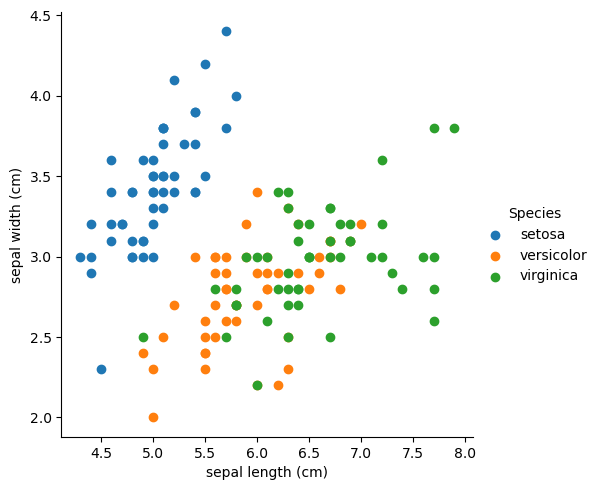

In [30]:
sns.FacetGrid(iris_df, hue="Species", height=5) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()

plt.show()

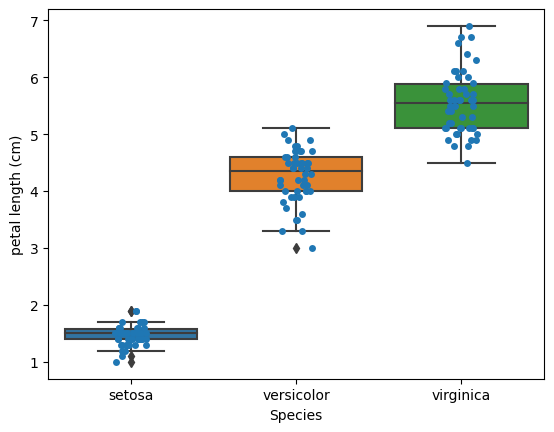

In [33]:
ax = sns.boxplot(x="Species", y="petal length (cm)", data=iris_df)
ax = sns.stripplot(x="Species", y="petal length (cm)", data=iris_df, jitter=True, edgecolor="gray")

plt.show()

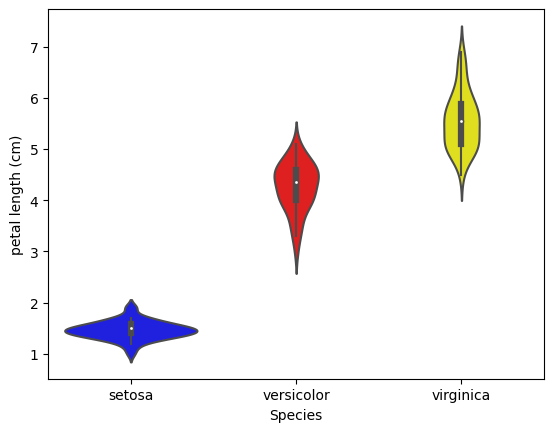

In [37]:
sns.violinplot(x="Species", y="petal length (cm)", palette={"setosa": "blue", "versicolor": "red", "virginica": "yellow"}, data=iris_df)
plt.show()

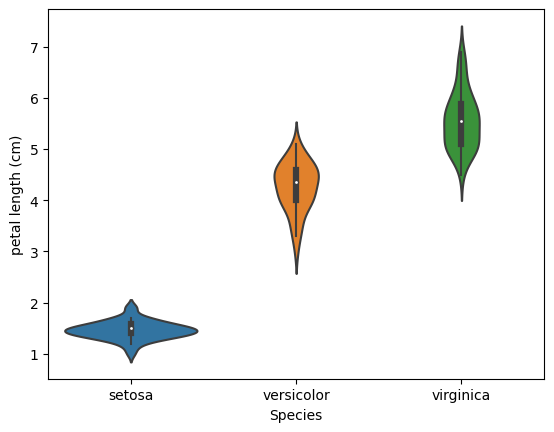

In [39]:
sns.violinplot(x="Species", y="petal length (cm)", palette={"setosa": "blue", "versicolor": "red", "virginica": "yellow"}, data=iris_df)
plt.show()

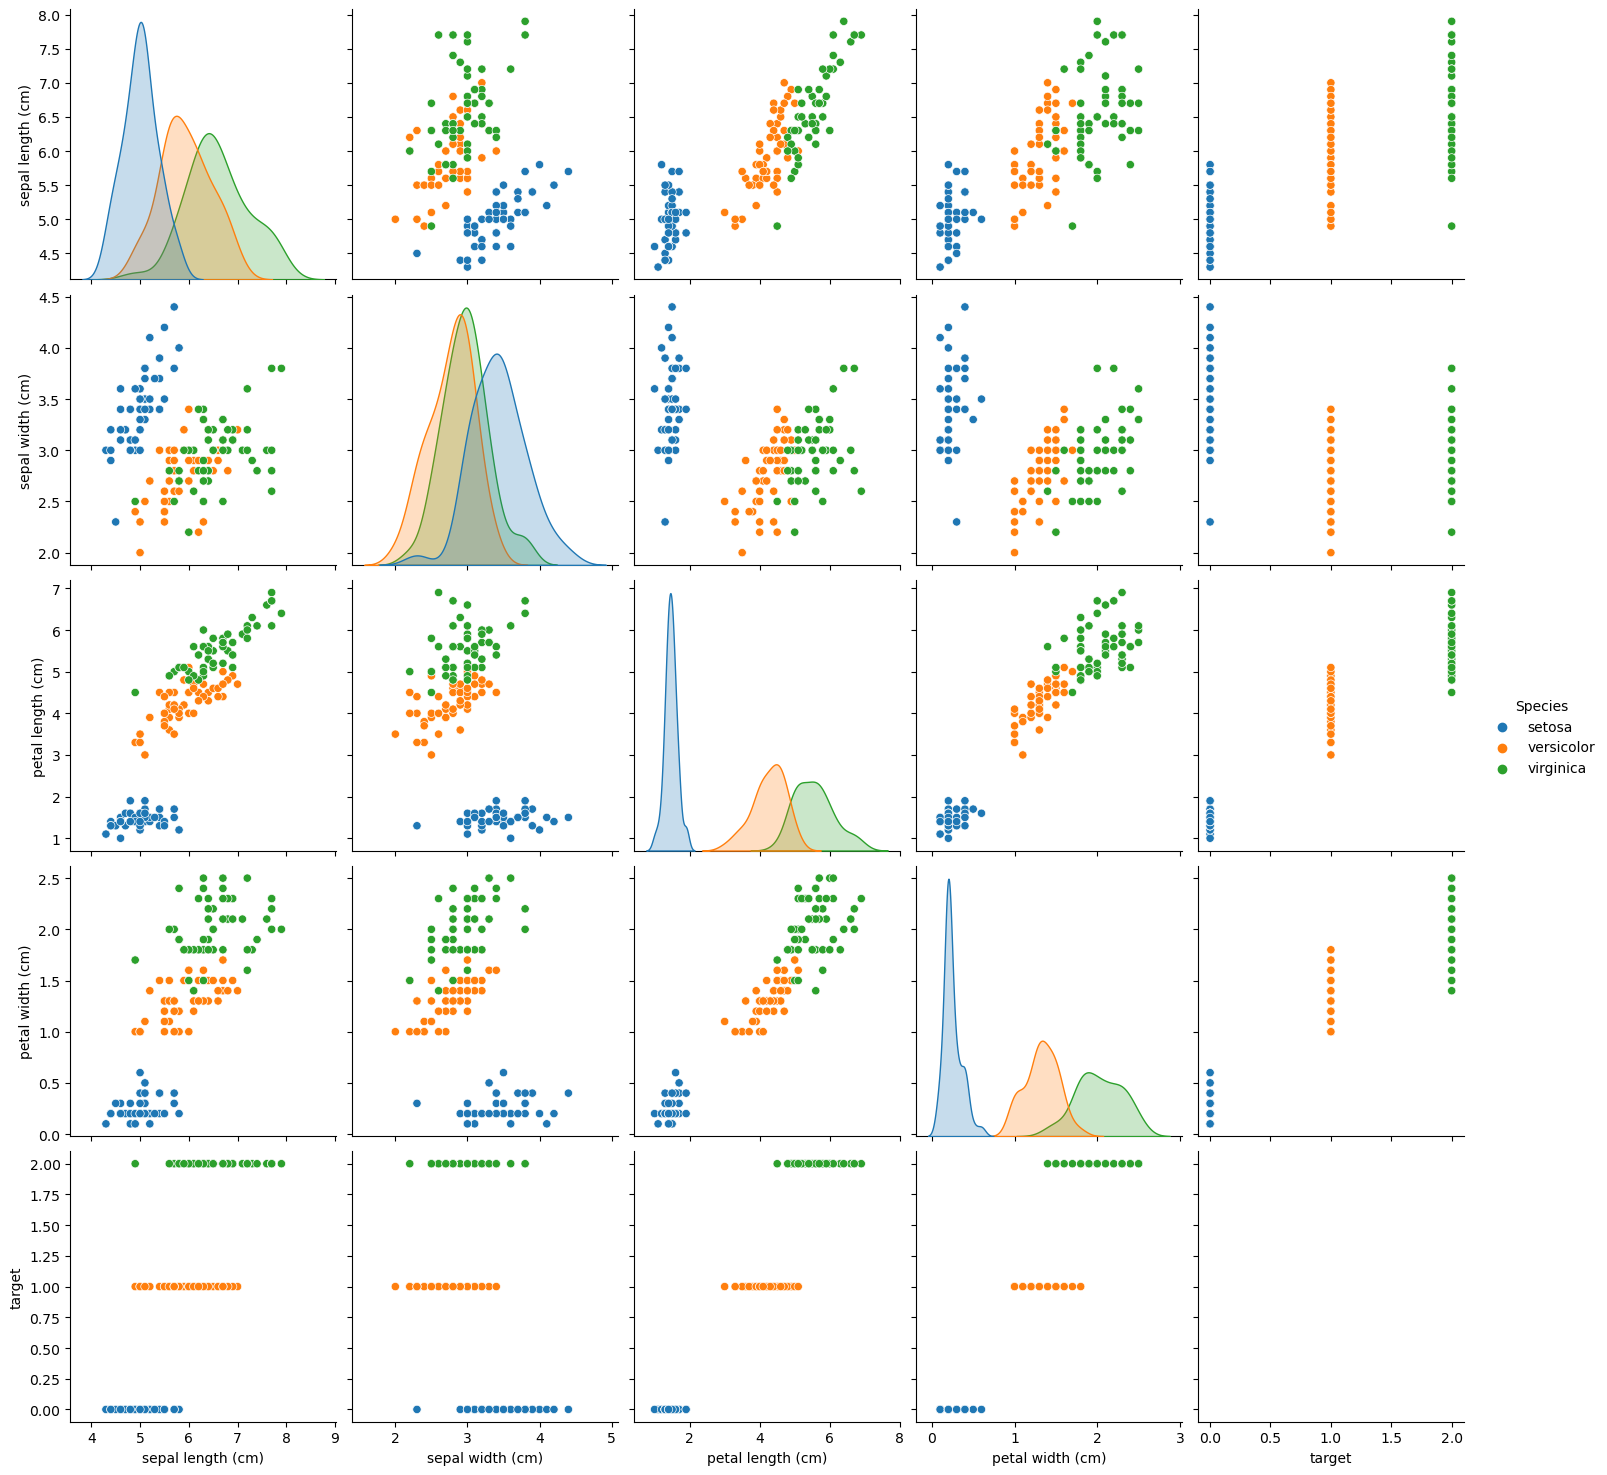

In [34]:
sns.pairplot(iris_df, hue="Species", height=3)
plt.show()

In [45]:
def knn_leave_one_out_diagonal(X, Y):
    """
    K-Nearest Neighbors classifier using leave-one-out cross-validation.
    
    Parameters:
    - X: numpy array of shape (n_samples, n_features), the feature matrix.
    - Y: numpy array of shape (n_samples,), the labels associated with each sample.
    
    Returns:
    - predictions: numpy array of shape (n_samples,), the predicted labels for each sample.
    """
    # Compute the squared Euclidean distance between all points
    dists = np.sqrt(np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :])**2, axis=2))
    
    # Set the diagonal (distance to self) to infinity to exclude it from nearest neighbor selection
    np.fill_diagonal(dists, np.inf)
    
    # Find the index of the nearest neighbor for each point (minimum distance)
    nearest_neighbors = np.argmin(dists, axis=1)
    
    # Return the labels of the nearest neighbors
    predictions = Y[nearest_neighbors]
    
    return predictions

X = iris.data  
Y = iris.target  

predictions = knn_leave_one_out_diagonal(X, Y)

accuracy = accuracy_score(Y, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.96


In [66]:
def knn_leave_one_out_maskarray(X, Y):
    """
    K-Nearest Neighbors classifier using leave-one-out cross-validation with a masked array.
    
    Parameters:
    - X: numpy array of shape (n_samples, n_features), the feature matrix.
    - Y: numpy array of shape (n_samples,), the labels associated with each sample.
    
    Returns:
    - predictions: numpy array of shape (n_samples,), the predicted labels for each sample.
    """
    # Compute the squared Euclidean distance between all points
    dists = np.sqrt(np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :])**2, axis=2))

    # Create a masked array where the diagonal is masked (ignored)
    masked_dists = np.ma.masked_array(dists, mask=np.eye(dists.shape[0]))

    # Find the index of the nearest neighbor for each point (minimum distance)
    nearest_neighbors = np.argmin(masked_dists, axis=1)
    
    # Return the labels of the nearest neighbors
    predictions = Y[nearest_neighbors]
    
    return predictions

X = iris.data  
Y = iris.target  

predictions = knn_leave_one_out_maskarray(X, Y)

accuracy = accuracy_score(Y, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.96


In [67]:


def calculate_error(predictions, Y):
    """
    Function to calculate the prediction error.
    
    Parameters:
    - predictions: numpy array of shape (n_samples,), the predicted labels.
    - Y: numpy array of shape (n_samples,), the true labels.
    
    Returns:
    - error_rate: float, the overall prediction error rate.
    """
    # Calculate the number of incorrect predictions (1 if incorrect, 0 if correct)
    errors = (predictions != Y).astype(int)
    
    # Calculate the overall error rate
    error_rate = np.mean(errors)
    
    return errors, error_rate



In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [96]:
predictions = knn_leave_one_out_maskarray(X, Y)

errors, error_rate = calculate_error(predictions, Y)

# Affichage des résultats
print("Prédictions:", predictions)
print("Taux d'erreur global:", error_rate)

Prédictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Taux d'erreur global: 0.04


In [74]:
def knn_leave_one_out_k_neighbors(X, Y, K=1):
    """
    K-Nearest Neighbors classifier using leave-one-out cross-validation for K neighbors.
    
    Parameters:
    - X: numpy array of shape (n_samples, n_features), the feature matrix.
    - Y: numpy array of shape (n_samples,), the labels associated with each sample.
    - K: int, the number of nearest neighbors to consider.
    
    Returns:
    - predictions: numpy array of shape (n_samples,), the predicted labels for each sample.
    """
    # Compute the squared Euclidean distance between all points
    dists = np.sqrt(np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :])**2, axis=2))

    # Create a masked array where the diagonal is masked (ignored)
    masked_dists = np.ma.masked_array(dists, mask=np.eye(dists.shape[0]))

    # Find the indices of the K nearest neighbors for each point (minimum distances)
    nearest_neighbors_indices = np.argsort(masked_dists, axis=1)[:, :K]
    
    # Predict the label by finding the majority class among the K nearest neighbors
    predictions = []
    for neighbors in nearest_neighbors_indices:
        # Get the labels of the K nearest neighbors
        neighbor_labels = Y[neighbors]
        # Determine the majority label (most common)
        majority_label = Counter(neighbor_labels).most_common(1)[0][0]
        predictions.append(majority_label)
    
    return np.array(predictions)

In [79]:
for K in [1, 3, 5, 7]:
    predictions = knn_leave_one_out_k_neighbors(X, Y, K=K)
    errors, error_rate = calculate_error(predictions, Y)
    print(f"K = {K}, Taux d'erreur global: {error_rate}")

K = 1, Taux d'erreur global: 0.04
K = 3, Taux d'erreur global: 0.04
K = 5, Taux d'erreur global: 0.03333333333333333
K = 7, Taux d'erreur global: 0.03333333333333333


In [80]:
print("We can see when K = 5 or K= 7, the error rate is better than when K= 1 or 3, so we can conclude that is better to choose 5 or 7 for K")

We can see when K = 5 or K= 7, the error rate is better than when K= 1 or 3, so we can conclude that is better to choose 5 or 7 for K


In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

print("Taille de l'ensemble d'apprentissage (X_train):", X_train.shape)
print("Taille de l'ensemble de test (X_test):", X_test.shape)

Taille de l'ensemble d'apprentissage (X_train): (105, 4)
Taille de l'ensemble de test (X_test): (45, 4)


In [90]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [91]:
# modèle SVM (Support Vector Classifier)
svm_model = SVC(kernel='linear')  

# Train
svm_model.fit(X_train, Y_train)

# Predict
Y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy du modèle SVM : {accuracy}")

print("Rapport de classification :")
print(classification_report(Y_test, Y_pred))

Accuracy du modèle SVM : 0.9555555555555556
Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.88      0.93        16
           2       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [84]:
print("we can see al value = 0,95, that show this model with a kernel linear is adapt to iris dataset")

we can see al value = 1, that show this model with a kernel linear is adapt to iris dataset


In [92]:
from sklearn.naive_bayes import GaussianNB

# Naïve Bayes (GaussianNB)
nb_model = GaussianNB()

# Train
nb_model.fit(X_train, Y_train)

# Predict
Y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy du modèle Naïve Bayes : {accuracy}")

print("Rapport de classification :")
print(classification_report(Y_test, Y_pred))

Accuracy du modèle Naïve Bayes : 0.9333333333333333
Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [93]:
print("We can see the GaussianNB for Naïve Bayes is effective, with an accuracy at 0,93. But SVM still better")

We can see the GaussianNB for Naïve Bayes is effective, with an accuracy at 0,97. But SVM still better


In [94]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Train
dt_model.fit(X_train, Y_train)

# Predict
Y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy du modèle Decision Tree : {accuracy}")

print("Rapport de classification :")
print(classification_report(Y_test, Y_pred))

Accuracy du modèle Decision Tree : 0.9555555555555556
Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.88      0.93        16
           2       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

